In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output
from bindsnet.models import DiehlAndCook2015
from bindsnet.network.monitors import Monitor
from bindsnet.encoding import poisson
from encoder import *
plt.rcParams["figure.figsize"] = (20, 20)

In [2]:
time = 500
network = DiehlAndCook2015(100*100*2, dt=1.0, norm=2000)
exc_monitor = Monitor(network.layers['Ae'], ['v', 's'], time=time)
network.add_monitor(exc_monitor, name='exc')

In [3]:
track1 = pickle.load(open('encoded.p', 'rb'))

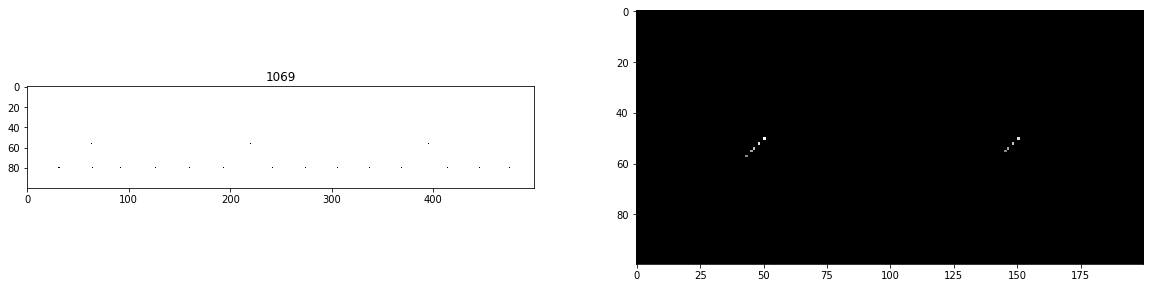

In [4]:
for i in range(1, len(track1)):
    orig = torch.cat((track1[i-1], track1[i]), dim=1)
    pt = orig.view(-1)
    pt = poisson(pt, time)
    
    inpts = {'X': pt}
    network.run(inpts=inpts, time=time)
    spikes = exc_monitor.get('s')
    
    fig = plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.title(f'{i}')
    plt.imshow(spikes, cmap='binary')
    plt.subplot(2, 2, 2)
    plt.imshow(orig, cmap='gist_gray')
    plt.show()
    
    clear_output(wait=True)

In [5]:
network.save('trained.net')